<a href="https://colab.research.google.com/github/KhadeejathMubeena/Data_Analysis/blob/main/student_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

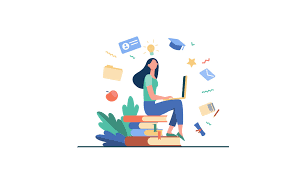

#Student data analysis

**This project is all about analysing on which factor student result is depending.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://github.com/Taj1920/Data_Analysis/raw/refs/heads/main/Student_analysis/student_data.csv')
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


# Data Cleaning

In [5]:
#removing unwanted columns
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [7]:
df['Gender']=df['Gender'].str.capitalize()
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19243 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               19243 non-null  object 
 1   EthnicGroup          19243 non-null  object 
 2   ParentEduc           19243 non-null  object 
 3   LunchType            19243 non-null  object 
 4   TestPrep             19243 non-null  object 
 5   ParentMaritalStatus  19243 non-null  object 
 6   PracticeSport        19243 non-null  object 
 7   IsFirstChild         19243 non-null  object 
 8   NrSiblings           19243 non-null  float64
 9   TransportMeans       19243 non-null  object 
 10  WklyStudyHours       19243 non-null  object 
 11  MathScore            19243 non-null  int64  
 12  ReadingScore         19243 non-null  int64  
 13  WritingScore         19243 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 2.2+ MB


In [14]:
df['ParentEduc'] = df['ParentEduc'].str.replace('some high school','high school')
df['ParentEduc'].unique()

array(["master's degree", 'some college', "associate's degree",
       'high school', "bachelor's degree"], dtype=object)

In [24]:
df['NrSiblings'] = df['NrSiblings'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19243 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               19243 non-null  object
 1   EthnicGroup          19243 non-null  object
 2   ParentEduc           19243 non-null  object
 3   LunchType            19243 non-null  object
 4   TestPrep             19243 non-null  object
 5   ParentMaritalStatus  19243 non-null  object
 6   PracticeSport        19243 non-null  object
 7   IsFirstChild         19243 non-null  object
 8   NrSiblings           19243 non-null  int64 
 9   TransportMeans       19243 non-null  object
 10  WklyStudyHours       19243 non-null  object
 11  MathScore            19243 non-null  int64 
 12  ReadingScore         19243 non-null  int64 
 13  WritingScore         19243 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 2.2+ MB


In [29]:
df['WritingScore'].unique()

array([ 91,  75,  79,  89,  39,  68,  43,  74,  71,  58,  28,  47,  63,
        70,  76,  53,  65,  72,  66,  85,  60,  90,  52,  55,  87,  49,
        10,  59,  37,  57,  64,  54,  73,  82,  67,  94,  61,  62,  48,
       100,  99,  51,  77,  86,  40,  41,  33,  95,  69,  88,  83,  78,
        56,  45,  98,  80,  19,  81,  26,  31,  84,  97,  93,  38,  46,
        96,  92,  44,  15,  30,  36,  32,  23,  50,  42,  29,  27,  17,
        35,  25,  34,  24,  20,  21,  14,  18,  12,  22,  16,  13,   4])

#Data visualization

<Axes: ylabel='Gender'>

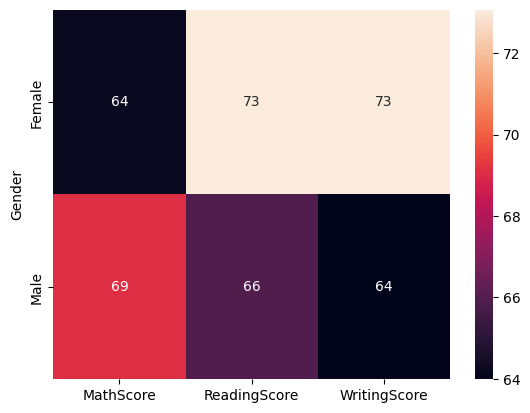

In [31]:
gender=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='Gender')
sns.heatmap(gender,annot=True)

**Student score depends on Gender.**

<Axes: ylabel='EthnicGroup'>

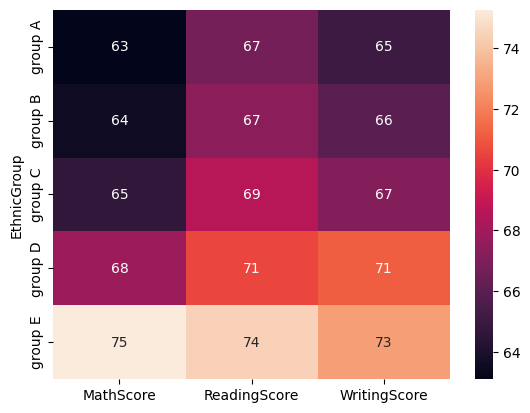

In [32]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='EthnicGroup')
sns.heatmap(group,annot=True)

**Ethnic group is affecting student score.**

<Axes: ylabel='ParentEduc'>

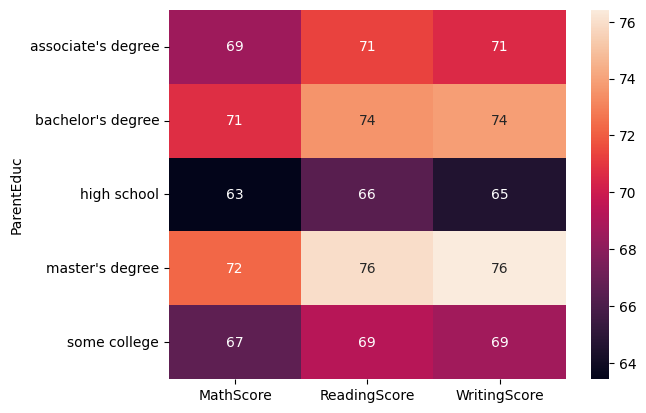

In [35]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='ParentEduc')
sns.heatmap(group,annot=True)

**Students with higher-educated parents tend to score better in Math, Reading, and Writing**

<Axes: ylabel='LunchType'>

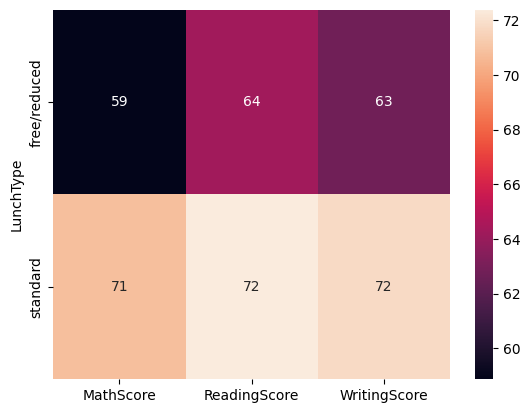

In [36]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='LunchType')
sns.heatmap(group,annot=True)

**Students who receive a better lunch type tend to have higher scores in Math, Reading, and Writing.**

<Axes: ylabel='TestPrep'>

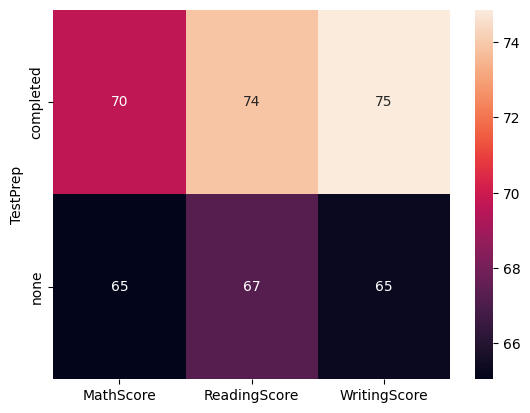

In [37]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='TestPrep')
sns.heatmap(group,annot=True)

**Students who underwent test preparation scored higher in Math, Reading, and Writing**

<Axes: ylabel='ParentMaritalStatus'>

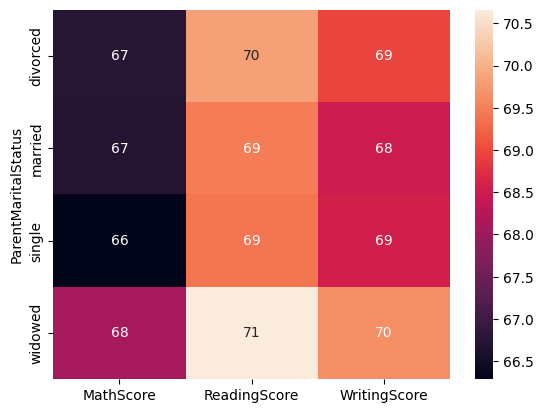

In [38]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='ParentMaritalStatus')
sns.heatmap(group,annot=True)

**Parental marital status does not significantly impact student performance in Math, Reading, and Writing**

<Axes: ylabel='PracticeSport'>

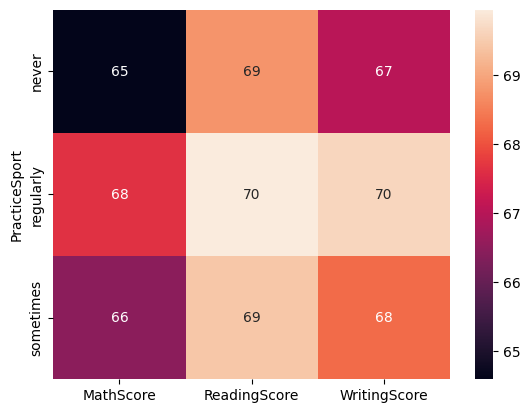

In [39]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='PracticeSport')
sns.heatmap(group,annot=True)

**Students who practice sports tend to perform better in Math, Reading, and Writing**

<Axes: ylabel='IsFirstChild'>

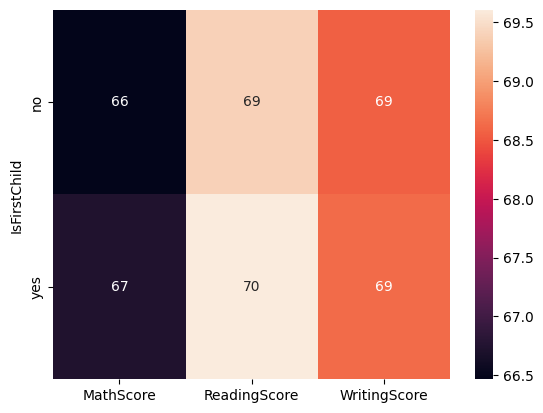

In [40]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='IsFirstChild')
sns.heatmap(group,annot=True)

**Being the first child does not significantly impact student performance**

<Axes: ylabel='NrSiblings'>

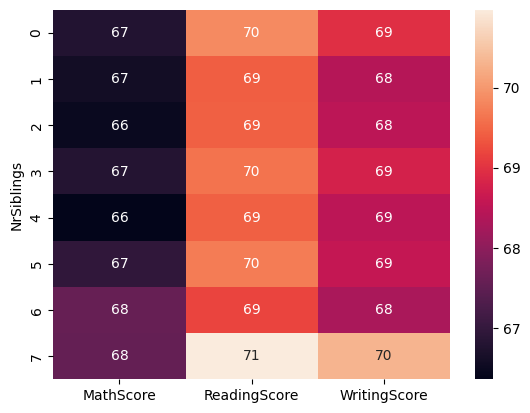

In [42]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='NrSiblings')
sns.heatmap(group,annot=True)

**The number of siblings does not significantly impact student performance**

**bold text**

<Axes: ylabel='TransportMeans'>

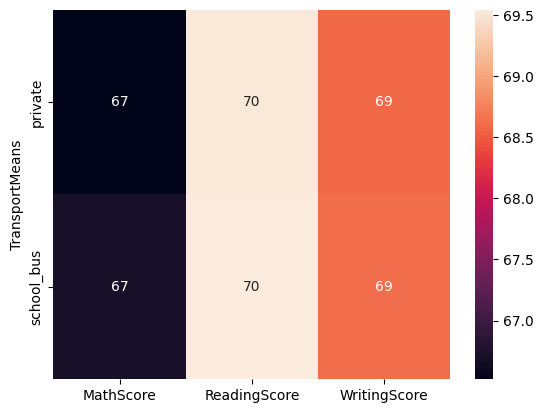

In [43]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='TransportMeans')
sns.heatmap(group,annot=True)

**The mode of transport does not significantly impact student performance**

<Axes: ylabel='WklyStudyHours'>

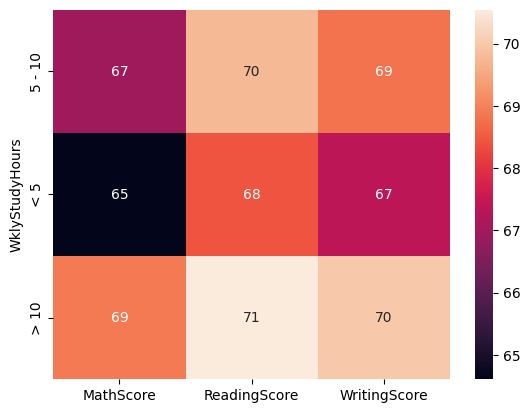

In [44]:
group=df.pivot_table(values=['MathScore','ReadingScore','WritingScore'],index='WklyStudyHours')
sns.heatmap(group,annot=True)

**Students who study more hours per week tend to score higher in Math, Reading, and Writing**

In [45]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 19243 entries, 2 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               19243 non-null  object
 1   EthnicGroup          19243 non-null  object
 2   ParentEduc           19243 non-null  object
 3   LunchType            19243 non-null  object
 4   TestPrep             19243 non-null  object
 5   ParentMaritalStatus  19243 non-null  object
 6   PracticeSport        19243 non-null  object
 7   IsFirstChild         19243 non-null  object
 8   NrSiblings           19243 non-null  int64 
 9   TransportMeans       19243 non-null  object
 10  WklyStudyHours       19243 non-null  object
 11  MathScore            19243 non-null  int64 
 12  ReadingScore         19243 non-null  int64 
 13  WritingScore         19243 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 2.2+ MB
